# Analysis of Global Nucleosome Positioning in *Arabidopsis thaliana*
**Author**: Emma Tung Corcoran </br>
**Date Last Modified**: July 27, 2021 </br>
**Description**: Micrococcal nuclease digestion with deep sequencing (MNase-seq) is a molecular biology technique that measures nucleosome occupancy across the whole genome. After processing paired-end MNase-seq data using the workflow here: https://github.com/etc27/MNaseseq-workflow/blob/main/README.md, tpm counts are generated corresponding to each gene.

In [2]:
#Load required dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
#Set path to save plot
save_path = "/Users/emmacorcoran/Documents/Jupyter Code/2021_05_24_MNase"

## Whole Gene Body
### Load and clean data

In [4]:
#Load data matrices
#Profile values at each gene
base_path = "/Users/emmacorcoran/Documents/NGS Data/MNase_2021_05_24/featurecounts/"
filename = "featurecounts_TPM.tab"
path_to_file = os.path.join(base_path, filename)
tpm_data = pd.read_csv(path_to_file, sep='\t')

In [5]:
tpm_data.head()

,idGene,final_counts_13-6.txt,final_counts_68-18D.txt,final_counts_arid5.txt,final_counts_Col.txt
0,AT1G01010,20.954620,24.090491,25.066619,27.649325
1,AT1G01020,16.078641,19.560498,17.097994,17.141686
2,AT1G03987,19.546504,34.706313,25.910654,24.250398
3,AT1G01030,23.454724,22.625269,21.963835,26.747690
4,AT1G01040,20.067776,19.363514,20.772528,20.051489


In [11]:
#Subsection for protein-coding genes
base_path = "/Users/emmacorcoran/Desktop/annotations"
filename = "proteincoding_1to5.txt"
path_to_file = os.path.join(base_path, filename)
proteincoding_list = pd.read_csv(path_to_file, sep='\t', names=['idGene','type'])
proteincoding_list.head()

,idGene,type
0,AT1G01010,protein_coding
1,AT1G01020,protein_coding
2,AT1G01030,protein_coding
3,AT1G01040,protein_coding
4,AT1G01050,protein_coding


In [12]:
metadata = pd.merge(tpm_data, proteincoding_list, on="idGene")
metadata.head()

,idGene,final_counts_13-6.txt,final_counts_68-18D.txt,final_counts_arid5.txt,final_counts_Col.txt,type
0,AT1G01010,20.954620,24.090491,25.066619,27.649325,protein_coding
1,AT1G01020,16.078641,19.560498,17.097994,17.141686,protein_coding
2,AT1G01030,23.454724,22.625269,21.963835,26.747690,protein_coding
3,AT1G01040,20.067776,19.363514,20.772528,20.051489,protein_coding
4,AT1G01050,15.099374,16.351593,18.836846,20.720375,protein_coding


#### Make boxplot of nucleosome read coverage over genes

In [15]:
df = metadata.iloc[:,1:5]
df.columns = ['13-6', '68-18D', 'arid5', 'Col']
df = df[['Col', '68-18D', '13-6', 'arid5']]
df.head()

,Col,68-18D,13-6,arid5
0,27.649325,24.090491,20.954620,25.066619
1,17.141686,19.560498,16.078641,17.097994
2,26.747690,22.625269,23.454724,21.963835
3,20.051489,19.363514,20.067776,20.772528
4,20.720375,16.351593,15.099374,18.836846


In [16]:
#Set font 
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 20})

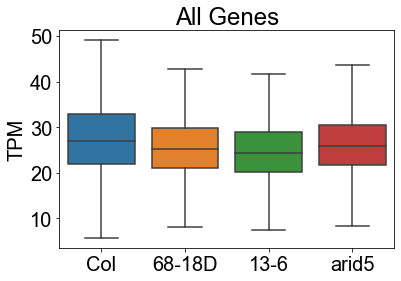

In [17]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), showfliers = False)
plt.title("All Genes")
plt.ylabel("TPM")
plt.xlabel("")
#plt.show()
filename = "Nucleosome Read Coverage/all_samples"
path_to_file = os.path.join(save_path, filename)
plt.savefig(path_to_file,bbox_inches='tight',dpi=500)

### T-test

In [83]:
print("Col vs 68-18D:", ttest_ind(df['Col'], df['68-18D'], equal_var=False))
print("13-6 vs 68-18D:", ttest_ind(df['13-6'], df['68-18D'], equal_var=False))
print("Col vs 13-6:", ttest_ind(df['Col'], df['13-6'], equal_var=False))
print("Col vs arid5:", ttest_ind(df['Col'], df['arid5'], equal_var=False))

Col vs 68-18D: Ttest_indResult(statistic=8.436657508244002, pvalue=3.343976873239101e-17)
13-6 vs 68-18D: Ttest_indResult(statistic=-3.1031801646372994, pvalue=0.001915530602796286)
Col vs 13-6: Ttest_indResult(statistic=10.826343291588923, pvalue=2.760783748424909e-27)
Col vs arid5: Ttest_indResult(statistic=5.80415089979248, pvalue=6.504820590104412e-09)


## Filter by different gene groups

In [91]:
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_07_08 RNA-seq/Up_and_Down"

#chr11/17 down-regulated genes
filename = "chr11chr17_downreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_downreg = deg_load(path_to_file, "idGene")
#chr11/17 up-regulated genes
filename = "chr11chr17_upreg.txt"
path_to_file = os.path.join(base_path, filename)
chr_upreg = deg_load(path_to_file, "idGene")

#R17A-2 down-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_downreg = deg_load(path_to_file, "idGene")
#R17A-2 up-regulated genes
filename = "13.9_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_9_upreg = deg_load(path_to_file, "idGene")

#R17A-1 down-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_downreg = deg_load(path_to_file, "idGene")
#R17A-1 up-regulated genes
filename = "13.6_downreg.txt"
path_to_file = os.path.join(base_path, filename)
x13_6_upreg = deg_load(path_to_file, "idGene")

#arid5 down-regulated genes
filename = "arid5_downreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_downreg = deg_load(path_to_file, "idGene")
#arid5 up-regulated genes
filename = "arid5_upreg.txt"
path_to_file = os.path.join(base_path, filename)
arid5_upreg = deg_load(path_to_file, "idGene")

#rlt1/2 down-regulated genes
filename = "rlt12_downreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_downreg = deg_load(path_to_file, "idGene")
#rlt1/2 up-regulated genes
filename = "rlt12_upreg.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_upreg = deg_load(path_to_file, "idGene")

In [92]:
def merge_upanddown(metadata, downreg, upreg):
    downreg_subset = pd.merge(metadata, downreg, on="idGene")
    upreg_subset = pd.merge(metadata, upreg, on="idGene")
    upreg_subset['DEG'] = "up"
    downreg_subset['DEG'] = "down"
    deg_subset = downreg_subset.append(upreg_subset)
    return(deg_subset)

In [93]:
#Merge metadata with DEG data
chr_deg_subset = merge_upanddown(metadata, chr_downreg, chr_upreg)
arid5_deg_subset = merge_upanddown(metadata, arid5_downreg, arid5_upreg)
rlt12_deg_subset = merge_upanddown(metadata, rlt12_downreg, rlt12_upreg)
x13_6_deg_subset = merge_upanddown(metadata, x13_6_downreg, x13_6_upreg)
x13_9_deg_subset = merge_upanddown(metadata, x13_9_downreg, x13_9_upreg)

In [94]:
def merge_all(metadata, deg_1, deg_2, deg_3=None, deg_4=None, deg_5=None):
    all_deg = pd.merge(deg_1, deg_2, on="idGene", how="outer")
    if deg_3 is not None:
        all_deg = pd.merge(all_deg, deg_3, on="idGene", how="outer")
    if deg_4 is not None:
        all_deg = pd.merge(all_deg, deg_4, on="idGene", how="outer")
    if deg_5 is not None:
        all_deg = pd.merge(all_deg, deg_5, on="idGene", how="outer")
    deg_subset = pd.merge(metadata, all_deg, on="idGene")
    return(deg_subset)

In [95]:
chr_deg = pd.merge(chr_downreg, chr_upreg, how="outer")
arid5_deg = pd.merge(arid5_downreg, arid5_upreg, how="outer")
rlt12_deg = pd.merge(rlt12_downreg, rlt12_upreg, how="outer")
x13_6_deg = pd.merge(x13_6_downreg, x13_6_upreg, how="outer")
x13_9_deg = pd.merge(x13_9_downreg, x13_9_upreg, how="outer")
x13_deg = pd.merge(x13_6_deg, x13_9_deg, how="outer")

iswi_deg_subset = merge_all(metadata, chr_deg, arid5_deg, rlt12_deg)
all_deg_subset = merge_all(metadata, chr_deg, arid5_deg, rlt12_deg, x13_deg)
x13_deg_subset = merge_all(metadata, x13_6_deg, x13_9_deg)

In [97]:
#Unaffected genes
# Load DEG data
def deg_load(path, name):
    deg_file = pd.read_csv(path_to_file, sep='\t', header=None)
    deg_file.columns = [name]
    return deg_file

base_path = "/Users/emmacorcoran/Documents/R Scripts/RNA-seq/2021_07_08 RNA-seq/Unaffected"

#chr11/17 Unaffected genes
filename = "chrvsCol.txt"
path_to_file = os.path.join(base_path, filename)
chr_unaffected = deg_load(path_to_file, "idGene")

#arid5 Unaffected genes
filename = "arid5vsCol.txt"
path_to_file = os.path.join(base_path, filename)
arid5_unaffected = deg_load(path_to_file, "idGene")

#rlt1/2 Unaffected genes
filename = "rlt12vsCol.txt"
path_to_file = os.path.join(base_path, filename)
rlt12_unaffected = deg_load(path_to_file, "idGene")

#13.6 Unaffected genes
filename = "13.6vsCol.txt"
path_to_file = os.path.join(base_path, filename)
s13_6_unaffected = deg_load(path_to_file, "idGene")

#13.9 Unaffected genes
filename = "13.9vsCol.txt"
path_to_file = os.path.join(base_path, filename)
s13_9_unaffected = deg_load(path_to_file, "idGene")

In [99]:
def merge_unaffected(metadata, deg_1, deg_2, deg_3=None, deg_4=None, deg_5=None):
    all_deg = pd.merge(deg_1, deg_2, on="idGene", how="outer")
    if deg_3 is not None:
        all_deg = pd.merge(all_deg, deg_3, on="idGene", how="outer")
    if deg_4 is not None:
        all_deg = pd.merge(all_deg, deg_4, on="idGene", how="outer")
    if deg_5 is not None:
        all_deg = pd.merge(all_deg, deg_5, on="idGene", how="outer")
    deg_subset = pd.merge(metadata, all_deg, on="idGene")
    return(deg_subset)

In [100]:
chr_unaffected_subset = pd.merge(metadata, chr_unaffected, on="idGene")
rlt12_unaffected_subset = pd.merge(metadata, rlt12_unaffected, on="idGene")
arid5_unaffected_subset = pd.merge(metadata, arid5_unaffected, on="idGene")
s13_6_unaffected_subset = pd.merge(metadata, s13_6_unaffected, on="idGene")
s13_9_unaffected_subset = pd.merge(metadata, s13_9_unaffected, on="idGene")

x13_unaffected = pd.merge(s13_6_unaffected, s13_9_unaffected, how="outer")

iswi_unaffected_subset = merge_unaffected(metadata, chr_unaffected, arid5_unaffected, rlt12_unaffected)
all_unaffected_subset = merge_unaffected(metadata, chr_unaffected, arid5_unaffected, rlt12_unaffected, x13_unaffected)
x13_unaffected_subset = merge_unaffected(metadata, s13_6_unaffected, s13_9_unaffected)

In [104]:
def plot_gene_group(all_data, name):
    df = all_data.iloc[:,1:5]
    df.columns = ['13-6', '68-18D', 'arid5', 'Col']
    df = df[['Col', '68-18D', '13-6', 'arid5']]
    
    #Plot data
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), showfliers = False)
    plt.title(name)
    plt.ylabel("TPM")
    plt.xlabel("")

    filename = "Nucleosome Read Coverage/"
    path_to_file = os.path.join(save_path, filename)
    plt.savefig(path_to_file+name)
    plt.clf()

In [105]:
#Plot data with all samples
plot_gene_group(chr_deg_subset, "chr11chr17_DEG")
plot_gene_group(arid5_deg_subset, "arid5_DEG")
plot_gene_group(rlt12_deg_subset, "rlt12_DEG")

plot_gene_group(iswi_deg_subset, "ISWI_DEG")
plot_gene_group(all_deg_subset, "all_DEG")
plot_gene_group(x13_deg_subset, "R17A_DEG")

plot_gene_group(chr_unaffected_subset, "chr11chr17_unaffected")
plot_gene_group(arid5_unaffected_subset, "arid5_unaffected")
plot_gene_group(rlt12_unaffected_subset, "rlt12_unaffected")

plot_gene_group(iswi_unaffected_subset, "ISWI_unaffected")
plot_gene_group(all_unaffected_subset, "all_unaffected")
plot_gene_group(x13_unaffected_subset, "R17A_unaffected")

<Figure size 432x288 with 0 Axes>